In [33]:
import pandas as pd
import numpy as np

In [34]:
data =pd.read_csv('data/Heart.csv')

In [35]:
data = data.drop(data.columns[0], axis=1)

In [36]:
data

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,typical,110,264,0,0,132,0,1.2,2,0.0,reversable,Yes
299,68,1,asymptomatic,144,193,1,0,141,0,3.4,2,2.0,reversable,Yes
300,57,1,asymptomatic,130,131,0,0,115,1,1.2,2,1.0,reversable,Yes
301,57,0,nontypical,130,236,0,2,174,0,0.0,2,1.0,normal,Yes


In [37]:
X = data.loc[:,'Age':'Thal']
y = data.loc[:,'AHD']

In [38]:
X = pd.get_dummies(X).fillna(0)
y = y.apply(lambda x: 1 if x == 'Yes' else 0)

In [39]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [60]:
from sklearn.model_selection import train_test_split, cross_val_score
X_train,X_test,y_train,y_test = train_test_split( X, y, test_size=0.33, random_state=42)

In [70]:
def plot(model):
    import matplotlib.pyplot as plt
    from sklearn.metrics import plot_confusion_matrix
    disp = plot_confusion_matrix(model, X_test, y_test,
                                    display_labels=['No','Yes'],
                                    cmap=plt.cm.Blues,
                                    normalize='true')
    disp.ax_.set_title('Confusion Matrix')
    print(f"Score is {cross_val_score(model,X=X,y=y,cv=5,scoring='roc_auc').mean():.4f}")
    # print(disp.confusion_matrix)

Score is 0.7519


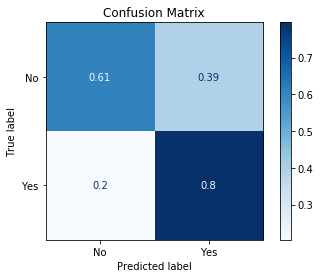

In [71]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train,y_train)
plot(model)

Score is 0.8567


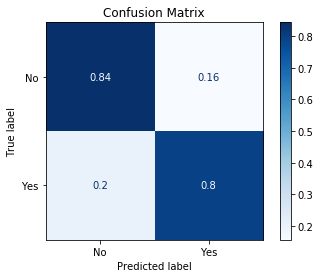

In [72]:
from sklearn.ensemble import BaggingClassifier
model = BaggingClassifier()
model.fit(X_train,y_train)
plot(model)

Score is 0.8754


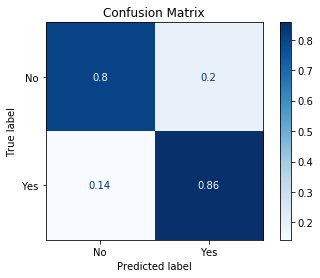

In [73]:
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier()
model.fit(X_train,y_train)
plot(model)

Score is 0.9111


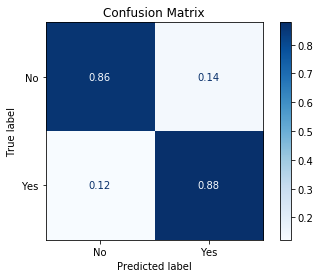

In [74]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,y_train)
plot(model)

In [93]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=1)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)


Score is 0.8998


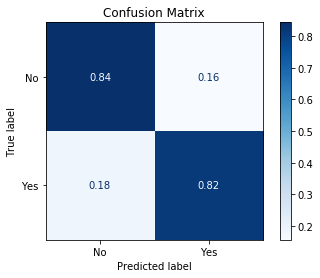

In [96]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(max_depth=10, random_state=0)
model.fit(X_train, y_train)
plot(model)